## 2022 08/19 Color Keying

*Last Updated*: 2022-08-19

### Authors
* April Zhang (april.zhang@berkeley.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* separating hand (foreground) vs green color (background)


### Structure of Notebook

* __Data Processing Functions__: implementations, basic documentation, and unit tests for
  data pipeline component


### Data Processing Functions

#### `load_images`

In [75]:
# --- Imports

# Standard library
import glob

# External packages
import cv2
import numpy as np

# --- Parameters
IMAGE_PATH = "/Users/aprilzhang/Downloads/test-images/"
FILE_TYPE = "jpeg"

# --- Function -> returns an array of images.
def load_images(IMAGE_PATH, FILE_TYPE):
    files = glob.glob(IMAGE_PATH + '/*.' + FILE_TYPE, recursive = True)
    images = []
    for image in files:
        img = cv2.imread(image)
        #img = img.astype('float64')  **cv2.cvtColor only works on uint8/float 32 dtype not float64
        images.append(img)
    return images
#img_list = load_images_from_folder(IMAGE_PATH, FILE_TYPE)

In [76]:
# --- Unit Tests

# Preparation
IMAGE_PATH = "/Users/aprilzhang/Downloads/test-images/"
FILE_TYPE = "jpeg"

# Exercise functionality
image_list = load_images(IMAGE_PATH, FILE_TYPE)

# Check results
assert(len(image_list) == 5)

#print(image_list[0].dtype)

In [77]:
from PIL import Image
from PIL import ImageFilter
import skimage

#### `green_threshold`

In [78]:
# --- Imports

# External packages
import cv2
import numpy as np

# --- Function -> returns the green thresholded image of `IMAGE`
def green_threshold(IMAGE, LOWER_GREEN, UPPER_GREEN):
    im = cv2.cvtColor(IMAGE, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(im, LOWER_GREEN, UPPER_GREEN)
    im[mask != 0] = [0, 0, 0]
    return im

(-0.5, 3023.5, 4031.5, -0.5)

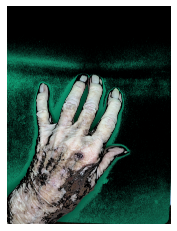

In [79]:
from matplotlib import pyplot as plt

# --- Unit Tests

# Preparation
# --- Parameters 
LOWER_GREEN = np.array([25, 75, 85]) #three element array specifying [R, G, B] values for lower threshold
UPPER_GREEN = np.array([130, 255, 190]) #three element array specifying [R, G, B] values for upper threshold
IMAGE = image_list[0] #image object

# Exercise functionality
im = green_threshold(IMAGE, LOWER_GREEN, UPPER_GREEN)

# Display results results
from matplotlib import pyplot as plt

plt.imshow(im)
plt.axis('off')